[View in Colaboratory](https://colab.research.google.com/github/cinngyang/Python/blob/master/Statistics_Normal.ipynb)

# 基本統計應用 - LED 產出分布與良率預估
<h2> 已知 LED 晶圓平均波長分布與標準差,假設允收條件為某一區間試問良率 ? <h2>
<h3>參考資料 </h3>
[Google colab 建立 Form](https://colab.research.google.com/notebooks/forms.ipynb)<br>

In [0]:
#@title Import package - Hiden the code cell. { display-mode: "form" }
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

Text(0.5,1,'CDF')

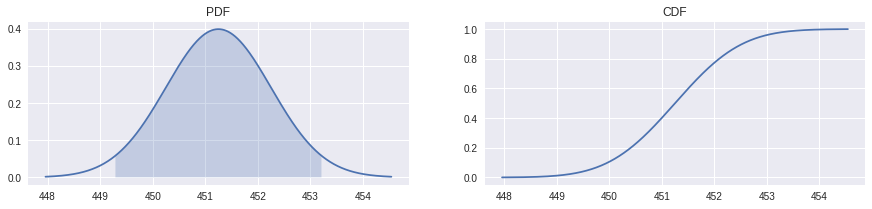

In [128]:
#@title Double click on this line in the code cell. { run: "auto", vertical-output: true, display-mode: "form" }
Wdd_Mean= 451.25 #@param {type:"number"}
Wdd_Std= 1 #@param {type:"number"}
Confidence= 0.95 #@param {type:"number"}

#Confidence interval with equal areas around the median.
#numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)

X = stats.norm(Wdd_Mean,Wdd_Std) #normal dist

X_min, X_max= X.interval(Confidence)
X_conf = np.linspace(X_min, X_max, 1000)

X_norMin, X_norMax= X.interval(0.999)
X_nor = np.linspace(X_norMin, X_norMax, 1000)

fig, axes = plt.subplots(1, 2,figsize=(15, 3))

axes[0].plot(X_nor,X.pdf(X_nor), label="PDF")
axes[0].fill_between(X_conf, X.pdf(X_conf), label="PDF",alpha=0.25)  # alpha 是透明度，alpha=0 表示 100% 透明，alpha=100 表示完全不透明
axes[0].set_title("PDF")

axes[1].plot(X_nor, X.cdf(X_nor), label="CDF")
axes[1].set_title("CDF")


WDD Yield 0.7887


Text(0.5,1,'CDF')

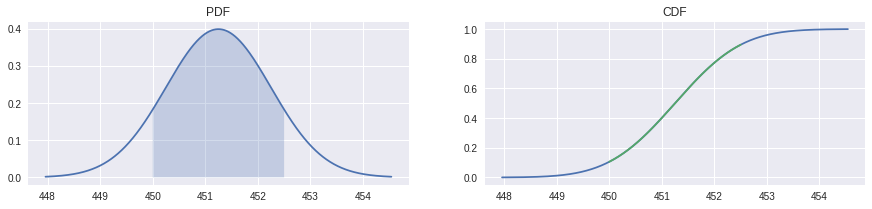

In [139]:
#@title Double click on this line in the code cell. { run: "auto", vertical-output: true, display-mode: "form" }

Wdd_Mean= 451.25 #@param {type:"number"}
Wdd_Std= 1 #@param {type:"number"}
Confidence= 0.95 #@param {type:"number"}
Wdd_Min= 450 #@param {type:"slider", min:440, max:470, step:2.5}
Wdd_Max = 452.5 #@param {type:"slider", min:440, max:470, step:2.5}

X = stats.norm(Wdd_Mean,Wdd_Std) #normal dist
X_norMin, X_norMax= X.interval(0.999)
X_nor = np.linspace(X_norMin, X_norMax, 1000)

#Confidence distrubtion
X_min, X_max= X.interval(Confidence)
#X_conf = np.linspace(X_min, X_max, 1000)
X_conf = np.linspace(Wdd_Min, Wdd_Max, 1000)

Yield=round(X.cdf(Wdd_Max)-X.cdf(Wdd_Min),4)
print('WDD Yield',Yield)


fig, axes = plt.subplots(1, 2,figsize=(15, 3))
axes[0].plot(X_nor,X.pdf(X_nor), label="PDF")
axes[0].fill_between(X_conf, X.pdf(X_conf), label="PDF",alpha=0.25)  # alpha 是透明度，alpha=0 表示 100% 透明，alpha=100 表示完全不透明
axes[0].set_title("PDF")

axes[1].plot(X_nor, X.cdf(X_nor), label="CDF")
axes[1].plot(X_conf, X.cdf(X_conf), label="CDF")
axes[1].set_title("CDF")
